In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
file_paths = {
    'Atlanta': 'c_atlanta.csv',
    'Baltimore': 'c_baltimore.csv',
    'Cleveland': 'c_cleveland.csv',
    'Detroit': 'c_detroit (1).csv',
    'Kansas City': 'c_kansascity.csv',
    'Louisville': 'c_louisville.csv',
    'Memphis': 'c_memphis (1).csv',
    'Sacramento': 'c_sacramento (1).csv',
    'Boston': 'c_boston (1).csv',
    'Tucson': 'c_tucson (1).csv'
}

In [ ]:
def load_and_process_dataset(file_path):
    df = pd.read_csv(file_path)
    predictors = ['season', 'time_of_day', 'day_of_week']
    target = 'crime_type'

    # Encode categorical variables
    for col in predictors + [target]:
        df[col] = pd.factorize(df[col])[0]

    return df, predictors, target

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to perform 20 random splits and evaluate KNN
def evaluate_knn_on_dataset(df, predictors, target, n_runs=20):
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    for _ in range(n_runs):
        # Random train-test split (70-30)
        X_train, X_test, y_train, y_test = train_test_split(
            df[predictors], df[target], test_size=0.3, random_state=None
        )

        # Train KNN model with default parameters
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)

        # Predictions
        y_pred = knn.predict(X_test)

        # Record performance metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recall_list.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1_list.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Calculate average metrics
    return {
        'Accuracy': np.mean(accuracy_list),
        'Precision': np.mean(precision_list),
        'Recall': np.mean(recall_list),
        'F1-Score': np.mean(f1_list),
    }

In [ ]:
# Function to perform parameter tuning and evaluate on holdout set
def tune_and_evaluate_knn(df, predictors, target):
    # Split data into training and holdout sets (70-30)
    X_train, X_holdout, y_train, y_holdout = train_test_split(
        df[predictors], df[target], test_size=0.3, random_state=42
    )

    # Define hyperparameter grid for KNN
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    # Perform grid search with cross-validation
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the best model on the holdout set
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_holdout)

    return {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy_score(y_holdout, y_pred),
        'Precision': precision_score(y_holdout, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_holdout, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_holdout, y_pred, average='weighted', zero_division=0),
    }


In [21]:
# Main script
results_default = {}
results_tuned = {}

for city, file_path in file_paths.items():
    print(f"Processing {city} dataset...")
    df, predictors, target = load_and_process_dataset(file_path)

    # Evaluate KNN with default parameters
    results_default[city] = evaluate_knn_on_dataset(df, predictors, target)

    # Perform parameter tuning and evaluate on holdout set
    results_tuned[city] = tune_and_evaluate_knn(df, predictors, target)

Processing Atlanta dataset...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Processing Baltimore dataset...
Processing Cleveland dataset...
Processing Detroit dataset...
Processing Kansas City dataset...
Processing Louisville dataset...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Processing Memphis dataset...
Processing Sacramento dataset...
Processing Boston dataset...
Processing Tucson dataset...


In [22]:
# Convert results to DataFrames for better visualization
results_default_df = pd.DataFrame(results_default).T
results_tuned_df = pd.DataFrame(results_tuned).T

In [23]:
# Save the results
results_default_df.to_csv('knn_default_results.csv')
results_tuned_df.to_csv('knn_tuned_results.csv')

In [24]:
# Display summary
print("Default Parameter Results:")
print(results_default_df)
print("\nTuned Parameter Results:")
print(results_tuned_df)

Default Parameter Results:
             Accuracy  Precision    Recall  F1-Score
Atlanta      0.434681   0.399967  0.434681  0.403360
Baltimore    0.499461   0.457548  0.499461  0.473060
Cleveland    0.758066   0.630554  0.758066  0.679120
Detroit      0.673380   0.571005  0.673380  0.605635
Kansas City  0.567645   0.570456  0.567645  0.568340
Louisville   0.709121   0.612484  0.709121  0.644752
Memphis      0.757454   0.660383  0.757454  0.693741
Sacramento   0.540823   0.473850  0.540823  0.498372
Boston       0.653468   0.534471  0.653468  0.573061
Tucson       0.396245   0.387962  0.396245  0.384819

Tuned Parameter Results:
                                               Best Parameters  Accuracy  \
Atlanta      {'metric': 'euclidean', 'n_neighbors': 9, 'wei...  0.453794   
Baltimore    {'metric': 'euclidean', 'n_neighbors': 9, 'wei...  0.545625   
Cleveland    {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   0.77061   
Detroit      {'metric': 'euclidean', 'n_neighbors': 9, 'wei.

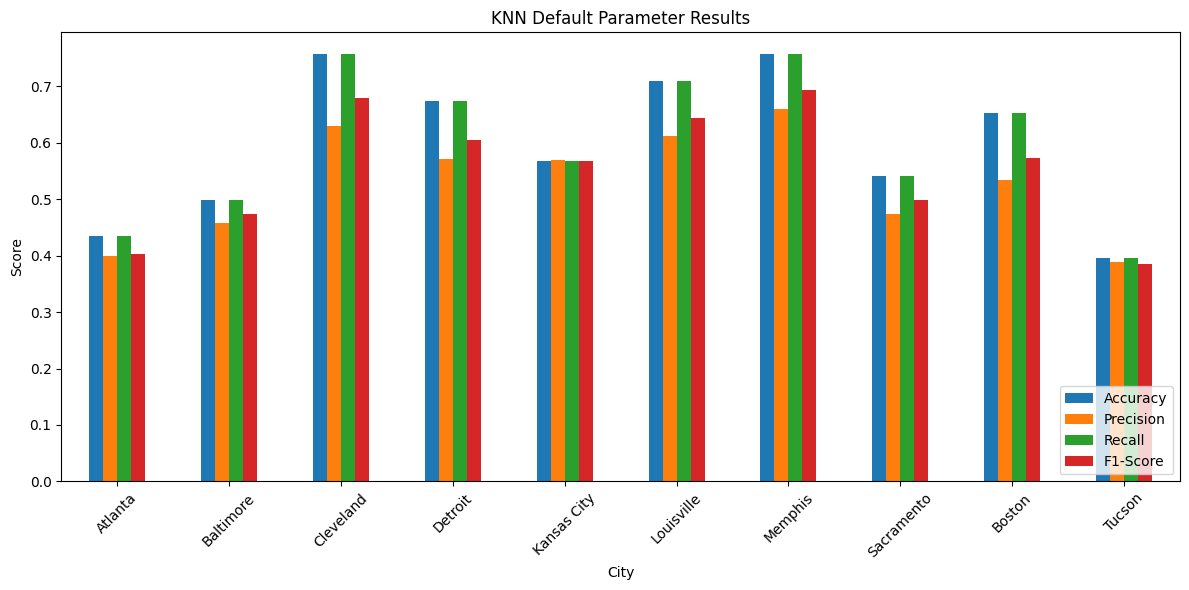

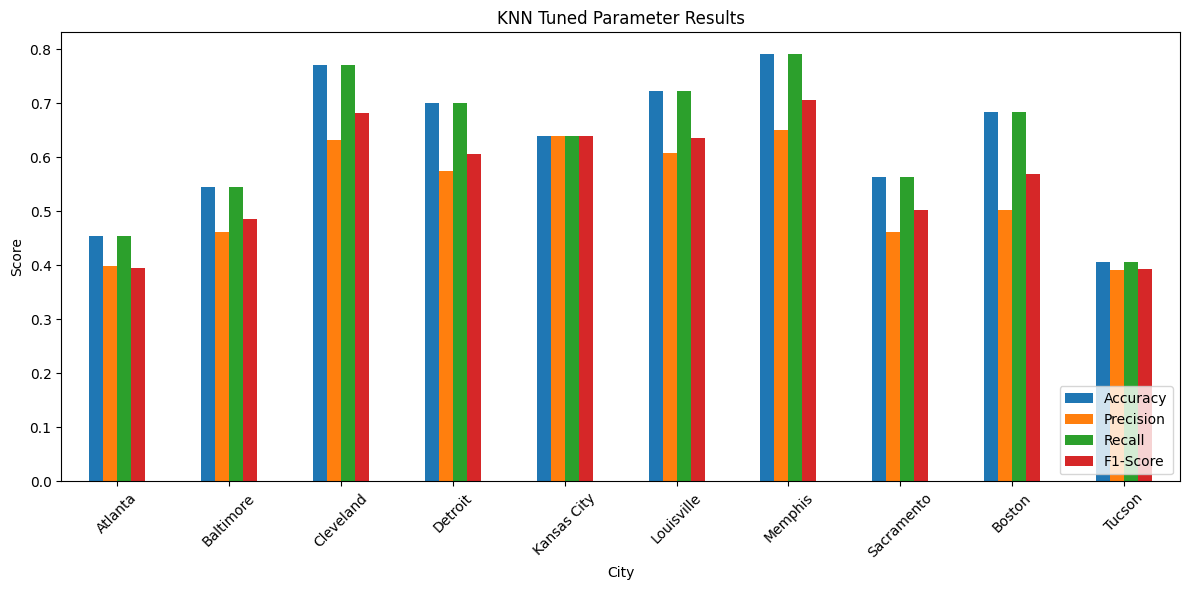

In [25]:
# Generate comparison plots
def plot_results(results_df, title):
    results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.ylabel('Score')
    plt.xlabel('City')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_results(results_default_df, "KNN Default Parameter Results")
plot_results(results_tuned_df, "KNN Tuned Parameter Results")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


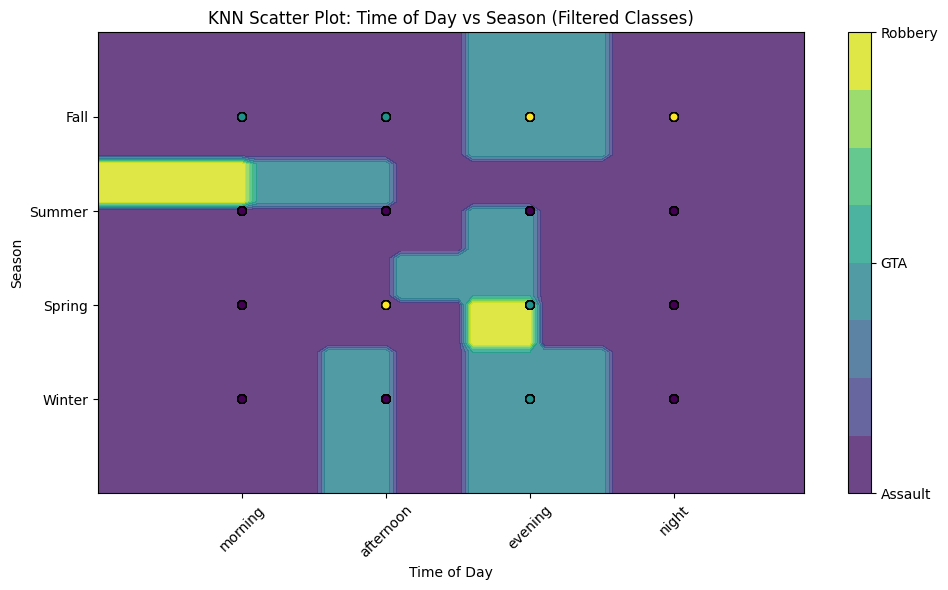

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'c_atlanta.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Keep only the desired crime categories
df = df[df['crime_type'].isin(['Robbery', 'Assault', 'GTA'])]

# Encode categorical variables and save mappings for labels
predictors = ['time_of_day', 'season']  # Focused features
target = 'crime_type'

label_encoders = {}
for col in predictors + [target]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Reorder seasons and times of day for plotting
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
time_of_day_order = ['morning', 'afternoon', 'evening', 'night']

df['season'] = pd.Categorical(
    label_encoders['season'].inverse_transform(df['season']),
    categories=season_order,
    ordered=True
)
df['time_of_day'] = pd.Categorical(
    label_encoders['time_of_day'].inverse_transform(df['time_of_day']),
    categories=time_of_day_order,
    ordered=True
)

# Re-encode the reordered categories
df['season'] = df['season'].cat.codes
df['time_of_day'] = df['time_of_day'].cat.codes

# Train-test split
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a grid for decision boundaries
x_min, x_max = X['time_of_day'].min() - 1, X['time_of_day'].max() + 1
y_min, y_max = X['season'].min() - 1, X['season'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decode predicted classes into crime category names
class_names = label_encoders[target].inverse_transform(range(len(label_encoders[target].classes_)))
Z_named = class_names[Z]

# Plot decision boundaries
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot for data points
plt.scatter(X['time_of_day'], X['season'], c=y, edgecolor='k', cmap='viridis')

# Update axes ticks to reflect the new order
plt.xticks(
    ticks=np.arange(len(time_of_day_order)),
    labels=time_of_day_order,
    rotation=45
)
plt.yticks(
    ticks=np.arange(len(season_order)),
    labels=season_order
)

# Update color bar to show crime categories
filtered_class_names = [name for name in class_names if name in ['Robbery', 'Assault', 'GTA']]
colorbar = plt.colorbar(contour)
colorbar.set_ticks(range(len(filtered_class_names)))
colorbar.set_ticklabels(filtered_class_names)

plt.title("KNN Scatter Plot: Time of Day vs Season (Filtered Classes)")
plt.xlabel('Time of Day')
plt.ylabel('Season')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


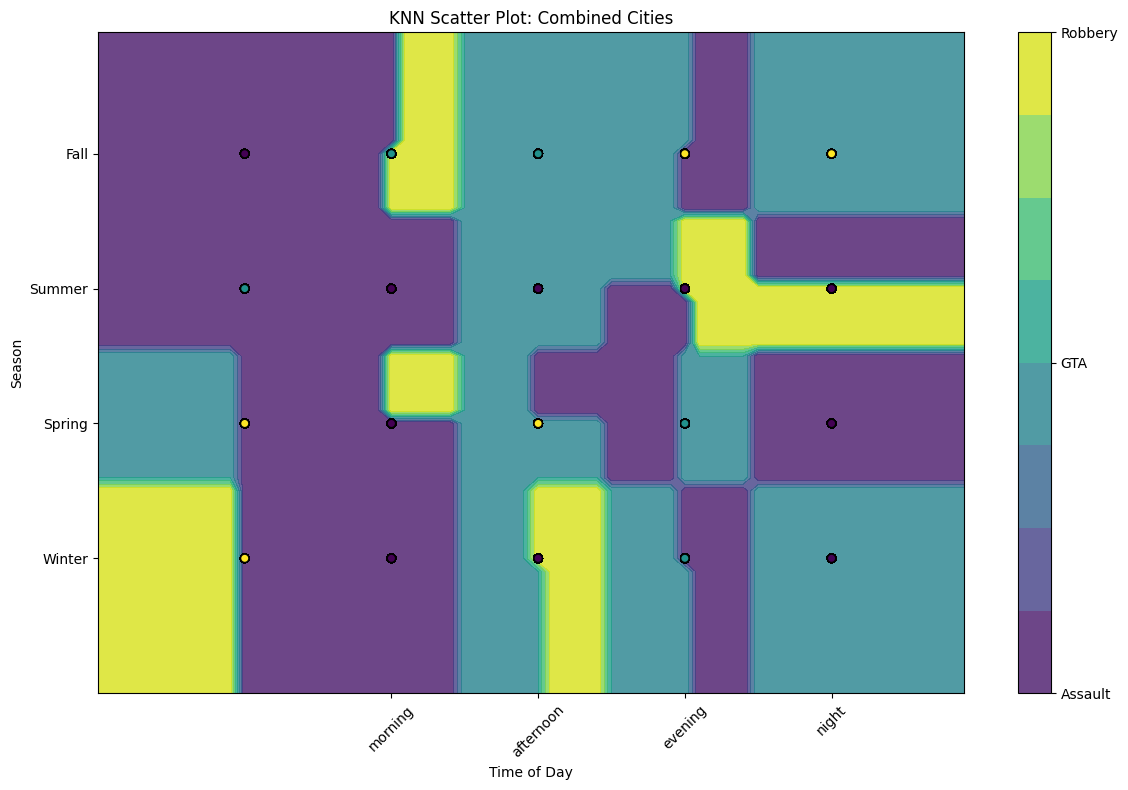

Combined Dataset Metrics:
{'Average Accuracy': 0.3550397535067118, 'Average Precision': 0.33620603312819675, 'Average Recall': 0.3550397535067118, 'Average F1-Score': 0.31188387735233003}


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of dataset paths and their corresponding names
file_paths = {
    'Atlanta': 'c_atlanta.csv',
    'Baltimore': 'c_baltimore.csv',
    'Cleveland': 'c_cleveland.csv',
    'Detroit': 'c_detroit (1).csv',
    'Kansas City': 'c_kansascity.csv',
    'Louisville': 'c_louisville.csv',
    'Memphis': 'c_memphis (1).csv',
    'Sacramento': 'c_sacramento (1).csv',
    'Boston': 'c_boston (1).csv',
    'Tucson': 'c_tucson (1).csv'
}

# Reordering for axes
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
time_of_day_order = ['morning', 'afternoon', 'evening', 'night']
filtered_classes = ['Robbery', 'Assault', 'GTA']

# Function to process all datasets into one combined DataFrame
def combine_datasets(file_paths):
    combined_df = pd.DataFrame()
    for city_name, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df = df[df['crime_type'].isin(filtered_classes)]  # Filter relevant classes
        df['City'] = city_name  # Add city identifier
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

# Function to process and evaluate the combined dataset
def process_and_evaluate_combined(df, n_runs=20):
    # Encode categorical variables and save mappings for labels
    predictors = ['time_of_day', 'season', 'City']
    target = 'crime_type'
    label_encoders = {}
    for col in predictors + [target]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Reorder seasons and times of day for plotting
    df['season'] = pd.Categorical(
        label_encoders['season'].inverse_transform(df['season']),
        categories=season_order,
        ordered=True
    )
    df['time_of_day'] = pd.Categorical(
        label_encoders['time_of_day'].inverse_transform(df['time_of_day']),
        categories=time_of_day_order,
        ordered=True
    )

    # Re-encode the reordered categories
    df['season'] = df['season'].cat.codes
    df['time_of_day'] = df['time_of_day'].cat.codes

    # Initialize metrics storage
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    knn = None  # Initialize the KNN model as None

    for run in range(n_runs):
        # Extract features and target
        X = df[predictors]
        y = df[target]

        # Split the data
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=run
            )
        except ValueError as e:
            print(f"Error during train-test split: {e}")
            continue  # Skip this run if there's an issue

        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        # Predictions
        y_pred = knn.predict(X_test)

        # Evaluate metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recall_list.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1_list.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Calculate average metrics
    avg_metrics = {
        'Average Accuracy': np.mean(accuracy_list),
        'Average Precision': np.mean(precision_list),
        'Average Recall': np.mean(recall_list),
        'Average F1-Score': np.mean(f1_list),
    }

    # Generate a representative scatter plot (from the first run)
    if knn:
        generate_combined_scatter_plot(df, knn, predictors, target, label_encoders)

    return avg_metrics

# Function to generate a scatter plot for the combined dataset
def generate_combined_scatter_plot(df, knn, predictors, target, label_encoders):
    # Check if the DataFrame is empty
    if df.empty:
        print("No data available after filtering. Skipping scatter plot.")
        return

    # Create a grid for decision boundaries
    x_min, x_max = df['time_of_day'].min() - 1, df['time_of_day'].max() + 1
    y_min, y_max = df['season'].min() - 1, df['season'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Fix the City value to a constant for visualization
    try:
        fixed_city = df['City'].iloc[0]  # Select the first city in the DataFrame
        # Check if 'City' is already encoded (numeric)
        if pd.api.types.is_numeric_dtype(df['City']):
            city_encoded = int(fixed_city)  # Convert to int if it's numeric
        else:
            city_encoded = label_encoders['City'].transform([fixed_city])[0]
    except IndexError:
        print("No valid 'City' data to select for visualization.")
        return

    # Repeat city_encoded to match the grid size
    city_column = np.full(xx.ravel().shape, city_encoded)

    # Predict over the grid
    try:
        grid_points = np.c_[xx.ravel(), yy.ravel(), city_column]  # Combine features
        Z = knn.predict(grid_points)
    except Exception as e:
        print(f"Error during prediction on grid: {e}")
        return

    Z = Z.reshape(xx.shape)

    # Decode predicted classes into crime category names
    try:
        class_names = label_encoders[target].inverse_transform(range(len(label_encoders[target].classes_)))
    except Exception as e:
        print(f"Error decoding class names: {e}")
        return

    # Plot decision boundaries
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Scatter plot for data points
    try:
        plt.scatter(df['time_of_day'], df['season'], c=df[target], edgecolor='k', cmap='viridis')
    except Exception as e:
        print(f"Error during scatter plot: {e}")
        return

    # Update axes ticks to reflect the new order
    plt.xticks(
        ticks=np.arange(len(time_of_day_order)),
        labels=time_of_day_order,
        rotation=45
    )
    plt.yticks(
        ticks=np.arange(len(season_order)),
        labels=season_order
    )

    # Update color bar to show crime categories
    filtered_class_names = [name for name in class_names if name in filtered_classes]
    try:
        colorbar = plt.colorbar(contour)
        colorbar.set_ticks(range(len(filtered_class_names)))
        colorbar.set_ticklabels(filtered_class_names)
    except Exception as e:
        print(f"Error updating colorbar: {e}")
        return

    plt.title("KNN Scatter Plot: Combined Cities")
    plt.xlabel('Time of Day')
    plt.ylabel('Season')
    plt.tight_layout()
    plt.savefig('combined_cities_scatter_plot.png')  # Save the plot as a PNG file
    plt.show()

# Combine all datasets
combined_df = combine_datasets(file_paths)

# Process and evaluate the combined dataset
metrics = process_and_evaluate_combined(combined_df)
print("Combined Dataset Metrics:")
print(metrics)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


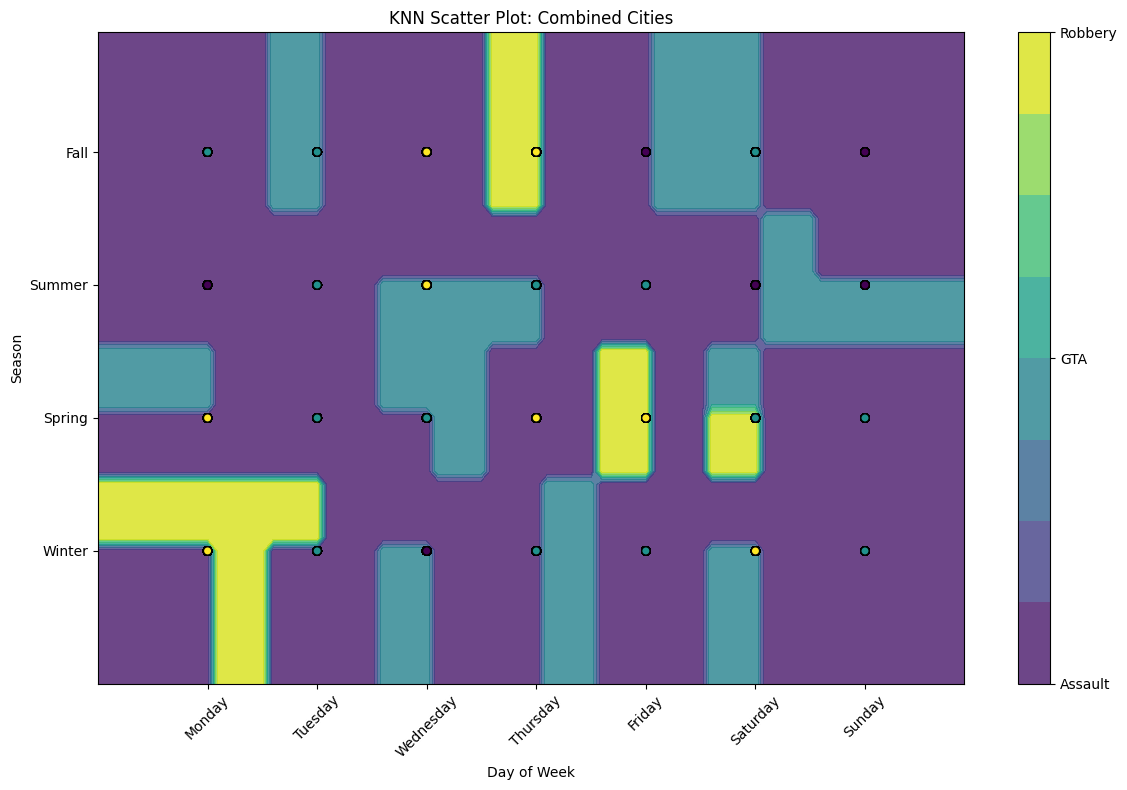

Combined Dataset Metrics:
{'Average Accuracy': 0.3595936308202797, 'Average Precision': 0.35569945054886076, 'Average Recall': 0.3595936308202797, 'Average F1-Score': 0.34379665224155703}


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of dataset paths and their corresponding names
file_paths = {
    'Atlanta': 'c_atlanta.csv',
    'Baltimore': 'c_baltimore.csv',
    'Cleveland': 'c_cleveland.csv',
    'Detroit': 'c_detroit (1).csv',
    'Kansas City': 'c_kansascity.csv',
    'Louisville': 'c_louisville.csv',
    'Memphis': 'c_memphis (1).csv',
    'Sacramento': 'c_sacramento (1).csv',
    'Boston': 'c_boston (1).csv',
    'Tucson': 'c_tucson (1).csv'
}

# Reordering for axes
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
filtered_classes = ['Robbery', 'Assault', 'GTA']

# Function to process all datasets into one combined DataFrame
def combine_datasets(file_paths):
    combined_df = pd.DataFrame()
    for city_name, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df = df[df['crime_type'].isin(filtered_classes)]  # Filter relevant classes
        df['City'] = city_name  # Add city identifier
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

# Function to process and evaluate the combined dataset
def process_and_evaluate_combined(df, n_runs=20):
    # Encode categorical variables and save mappings for labels
    predictors = ['day_of_week', 'season', 'City']
    target = 'crime_type'
    label_encoders = {}
    for col in predictors + [target]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Reorder seasons and days of the week for plotting
    df['season'] = pd.Categorical(
        label_encoders['season'].inverse_transform(df['season']),
        categories=season_order,
        ordered=True
    )
    df['day_of_week'] = pd.Categorical(
        label_encoders['day_of_week'].inverse_transform(df['day_of_week']),
        categories=day_of_week_order,
        ordered=True
    )

    # Re-encode the reordered categories
    df['season'] = df['season'].cat.codes
    df['day_of_week'] = df['day_of_week'].cat.codes

    # Initialize metrics storage
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    knn = None  # Initialize the KNN model as None

    for run in range(n_runs):
        # Extract features and target
        X = df[predictors]
        y = df[target]

        # Split the data
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=run
            )
        except ValueError as e:
            print(f"Error during train-test split: {e}")
            continue  # Skip this run if there's an issue

        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        # Predictions
        y_pred = knn.predict(X_test)

        # Evaluate metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recall_list.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1_list.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Calculate average metrics
    avg_metrics = {
        'Average Accuracy': np.mean(accuracy_list),
        'Average Precision': np.mean(precision_list),
        'Average Recall': np.mean(recall_list),
        'Average F1-Score': np.mean(f1_list),
    }

    # Generate a representative scatter plot (from the first run)
    if knn:
        generate_combined_scatter_plot(df, knn, predictors, target, label_encoders)

    return avg_metrics

# Function to generate a scatter plot for the combined dataset
def generate_combined_scatter_plot(df, knn, predictors, target, label_encoders):
    # Check if the DataFrame is empty
    if df.empty:
        print("No data available after filtering. Skipping scatter plot.")
        return

    # Create a grid for decision boundaries
    x_min, x_max = df['day_of_week'].min() - 1, df['day_of_week'].max() + 1
    y_min, y_max = df['season'].min() - 1, df['season'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Fix the City value to a constant for visualization
    try:
        fixed_city = df['City'].iloc[0]  # Select the first city in the DataFrame
        # Check if 'City' is already encoded (numeric)
        if pd.api.types.is_numeric_dtype(df['City']):
            city_encoded = int(fixed_city)  # Convert to int if it's numeric
        else:
            city_encoded = label_encoders['City'].transform([fixed_city])[0]
    except IndexError:
        print("No valid 'City' data to select for visualization.")
        return

    # Repeat city_encoded to match the grid size
    city_column = np.full(xx.ravel().shape, city_encoded)

    # Predict over the grid
    try:
        grid_points = np.c_[xx.ravel(), yy.ravel(), city_column]  # Combine features
        Z = knn.predict(grid_points)
    except Exception as e:
        print(f"Error during prediction on grid: {e}")
        return

    Z = Z.reshape(xx.shape)

    # Decode predicted classes into crime category names
    try:
        class_names = label_encoders[target].inverse_transform(range(len(label_encoders[target].classes_)))
    except Exception as e:
        print(f"Error decoding class names: {e}")
        return

    # Plot decision boundaries
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Scatter plot for data points
    try:
        plt.scatter(df['day_of_week'], df['season'], c=df[target], edgecolor='k', cmap='viridis')
    except Exception as e:
        print(f"Error during scatter plot: {e}")
        return

    # Update axes ticks to reflect the new order
    plt.xticks(
        ticks=np.arange(len(day_of_week_order)),
        labels=day_of_week_order,
        rotation=45
    )
    plt.yticks(
        ticks=np.arange(len(season_order)),
        labels=season_order
    )

    # Update color bar to show crime categories
    filtered_class_names = [name for name in class_names if name in filtered_classes]
    try:
        colorbar = plt.colorbar(contour)
        colorbar.set_ticks(range(len(filtered_class_names)))
        colorbar.set_ticklabels(filtered_class_names)
    except Exception as e:
        print(f"Error updating colorbar: {e}")
        return

    plt.title("KNN Scatter Plot: Combined Cities")
    plt.xlabel('Day of Week')
    plt.ylabel('Season')
    plt.tight_layout()
    plt.savefig('combined_cities_scatter_plot.png')  # Save the plot as a PNG file
    plt.show()

# Combine all datasets
combined_df = combine_datasets(file_paths)

# Process and evaluate the combined dataset
metrics = process_and_evaluate_combined(combined_df)
print("Combined Dataset Metrics:")
print(metrics)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


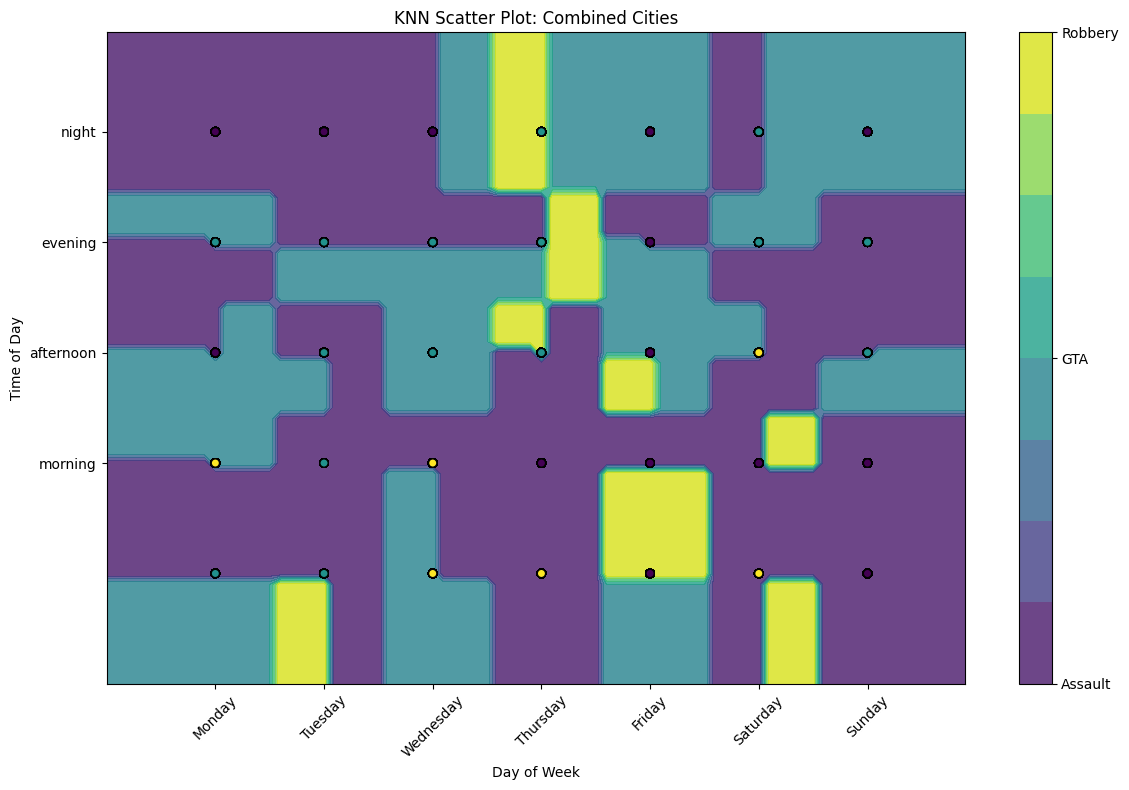

Combined Dataset Metrics:
{'Average Accuracy': 0.36369718385727523, 'Average Precision': 0.349972175256366, 'Average Recall': 0.36369718385727523, 'Average F1-Score': 0.32791198971107277}


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of dataset paths and their corresponding names
file_paths = {
    'Atlanta': 'c_atlanta.csv',
    'Baltimore': 'c_baltimore.csv',
    'Cleveland': 'c_cleveland.csv',
    'Detroit': 'c_detroit (1).csv',
    'Kansas City': 'c_kansascity.csv',
    'Louisville': 'c_louisville.csv',
    'Memphis': 'c_memphis (1).csv',
    'Sacramento': 'c_sacramento (1).csv',
    'Boston': 'c_boston (1).csv',
    'Tucson': 'c_tucson (1).csv'
}

# Reordering for axes
time_of_day_order = ['morning', 'afternoon', 'evening', 'night']
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
filtered_classes = ['Robbery', 'Assault', 'GTA']

# Function to process all datasets into one combined DataFrame
def combine_datasets(file_paths):
    combined_df = pd.DataFrame()
    for city_name, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df = df[df['crime_type'].isin(filtered_classes)]  # Filter relevant classes
        df['City'] = city_name  # Add city identifier
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

# Function to process and evaluate the combined dataset
def process_and_evaluate_combined(df, n_runs=20):
    # Encode categorical variables and save mappings for labels
    predictors = ['day_of_week', 'time_of_day', 'City']
    target = 'crime_type'
    label_encoders = {}
    for col in predictors + [target]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Reorder time of day and days of the week for plotting
    df['time_of_day'] = pd.Categorical(
        label_encoders['time_of_day'].inverse_transform(df['time_of_day']),
        categories=time_of_day_order,
        ordered=True
    )
    df['day_of_week'] = pd.Categorical(
        label_encoders['day_of_week'].inverse_transform(df['day_of_week']),
        categories=day_of_week_order,
        ordered=True
    )

    # Re-encode the reordered categories
    df['time_of_day'] = df['time_of_day'].cat.codes
    df['day_of_week'] = df['day_of_week'].cat.codes

    # Initialize metrics storage
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    knn = None  # Initialize the KNN model as None

    for run in range(n_runs):
        # Extract features and target
        X = df[predictors]
        y = df[target]

        # Split the data
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=run
            )
        except ValueError as e:
            print(f"Error during train-test split: {e}")
            continue  # Skip this run if there's an issue

        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        # Predictions
        y_pred = knn.predict(X_test)

        # Evaluate metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recall_list.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1_list.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Calculate average metrics
    avg_metrics = {
        'Average Accuracy': np.mean(accuracy_list),
        'Average Precision': np.mean(precision_list),
        'Average Recall': np.mean(recall_list),
        'Average F1-Score': np.mean(f1_list),
    }

    # Generate a representative scatter plot (from the first run)
    if knn:
        generate_combined_scatter_plot(df, knn, predictors, target, label_encoders)

    return avg_metrics

# Function to generate a scatter plot for the combined dataset
def generate_combined_scatter_plot(df, knn, predictors, target, label_encoders):
    # Check if the DataFrame is empty
    if df.empty:
        print("No data available after filtering. Skipping scatter plot.")
        return

    # Create a grid for decision boundaries
    x_min, x_max = df['day_of_week'].min() - 1, df['day_of_week'].max() + 1
    y_min, y_max = df['time_of_day'].min() - 1, df['time_of_day'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Fix the City value to a constant for visualization
    try:
        fixed_city = df['City'].iloc[0]  # Select the first city in the DataFrame
        # Check if 'City' is already encoded (numeric)
        if pd.api.types.is_numeric_dtype(df['City']):
            city_encoded = int(fixed_city)  # Convert to int if it's numeric
        else:
            city_encoded = label_encoders['City'].transform([fixed_city])[0]
    except IndexError:
        print("No valid 'City' data to select for visualization.")
        return

    # Repeat city_encoded to match the grid size
    city_column = np.full(xx.ravel().shape, city_encoded)

    # Predict over the grid
    try:
        grid_points = np.c_[xx.ravel(), yy.ravel(), city_column]  # Combine features
        Z = knn.predict(grid_points)
    except Exception as e:
        print(f"Error during prediction on grid: {e}")
        return

    Z = Z.reshape(xx.shape)

    # Decode predicted classes into crime category names
    try:
        class_names = label_encoders[target].inverse_transform(range(len(label_encoders[target].classes_)))
    except Exception as e:
        print(f"Error decoding class names: {e}")
        return

    # Plot decision boundaries
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

    # Scatter plot for data points
    try:
        plt.scatter(df['day_of_week'], df['time_of_day'], c=df[target], edgecolor='k', cmap='viridis')
    except Exception as e:
        print(f"Error during scatter plot: {e}")
        return

    # Update axes ticks to reflect the new order
    plt.xticks(
        ticks=np.arange(len(day_of_week_order)),
        labels=day_of_week_order,
        rotation=45
    )
    plt.yticks(
        ticks=np.arange(len(time_of_day_order)),
        labels=time_of_day_order
    )

    # Update color bar to show crime categories
    filtered_class_names = [name for name in class_names if name in filtered_classes]
    try:
        colorbar = plt.colorbar(contour)
        colorbar.set_ticks(range(len(filtered_class_names)))
        colorbar.set_ticklabels(filtered_class_names)
    except Exception as e:
        print(f"Error updating colorbar: {e}")
        return

    plt.title("KNN Scatter Plot: Combined Cities")
    plt.xlabel('Day of Week')
    plt.ylabel('Time of Day')
    plt.tight_layout()
    plt.savefig('combined_cities_scatter_plot.png')  # Save the plot as a PNG file
    plt.show()

# Combine all datasets
combined_df = combine_datasets(file_paths)

# Process and evaluate the combined dataset
metrics = process_and_evaluate_combined(combined_df)
print("Combined Dataset Metrics:")
print(metrics)
